In [1]:
import json
from functions import read_json

from methods import Single_keyword_Sort_Filter_By_Year, Single_keyword_Sort_Filter_All_Year, Single_keyword_All_Year
from methods import Add_to_tabu_json, Add_to_replace_json, Plot_Whole_Year_Barchart

# 01 - Process and Visualise Single Word Data

/Users/qmy/Documents/Development/UP_knowledge/methods.py:127: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(X_lis, rotation=90)
/Users/qmy/Documents/Development/UP_knowledge/methods.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


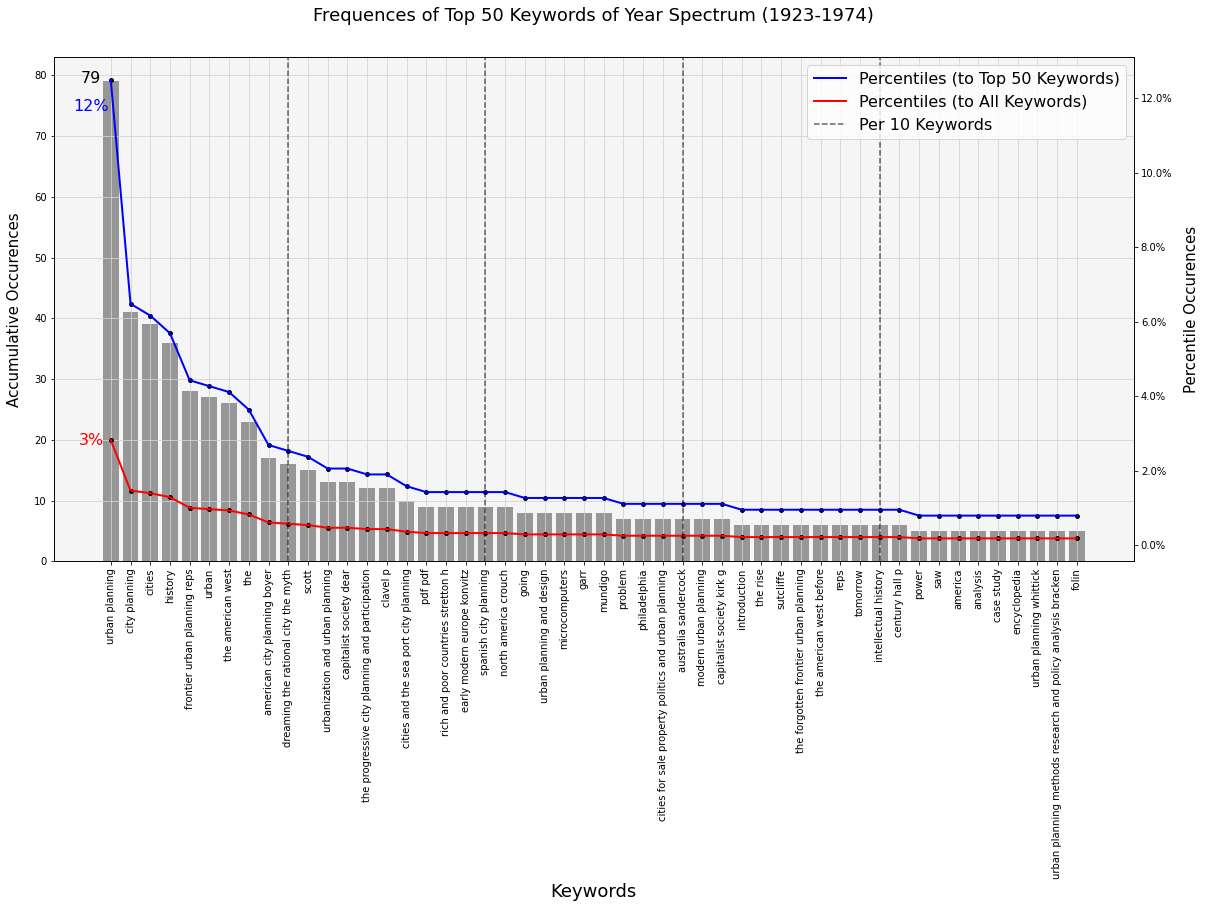

In [3]:
file_dir = './Data_samples/structured_data/words_count.json'
ref_words = './Data_samples/ref_word.json'
display_threshold_per_year = 20  # number of top keywords to display per year
display_threshold_all_years = 50 # number of top keywords to display for the whole year specturm

dic_yr = Single_keyword_Sort_Filter_By_Year(file_dir, display_threshold_per_year)
whole_dic, original_occur = Single_keyword_Sort_Filter_All_Year(file_dir, display_threshold_all_years)

Plot_Whole_Year_Barchart(file_dir, display_threshold_all_years)

# 03 - Add Tabu / Replacement Words

In [3]:
Add_to_tabu_json('problem', ref_words)
Add_to_replace_json('town planning','urban planning',ref_words)

The word 'problem' already exists
Succefully added 'town planning' to existing mainword 'urban planning'
